### VERY Important  : XOR

In [0]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.set_random_seed(777)  # for reproducibility

set_random_seed() 함수는 난수를 생성할 때 사용되는 시드 값을 줆으로써 고정된 랜덤 값을 부여한다. (TMI : 보통 암묵적으로 42을 사용한다.)

* Hyperparameters

In [0]:
learning_rate = 0.1 # 학습률(학습 범위같은 개념이다. 1만 올리고 싶은데 10을 올린다거나 5를 내리고 싶은데 1만 내린다거나 하는 요인이다.)
nb_epoch = 10000 # 반복횟수

* Dataset

In [0]:
x_data = [[0, 0],
          [0, 1],
          [1, 0],
          [1, 1]]

y_data = [[0],
          [1],
          [1],
          [0]]

In [0]:
x_data = np.array(x_data, dtype=np.float32)
y_data = np.array(y_data, dtype=np.float32)

In [5]:
X = tf.placeholder(tf.float32, [None, 2])
Y = tf.placeholder(tf.float32, [None, 1])

# Variable이 최종적으로 바뀌는 부분.
W1 = tf.Variable(tf.random_normal([2, 2]), name='weight1')
b1 = tf.Variable(tf.random_normal([2]), name='bias1')
layer1 = tf.sigmoid(tf.matmul(X, W1) + b1) # 엄청 큰 값이 와도 1로 받아들이겠다~ 라는 의미 Sigmoid에 관해선 후술.

W2 = tf.Variable(tf.random_normal([2, 1]), name='weight2') # 이 파트는 AND_GATE에서 사용했던 Layer의 모습과 같다.
b2 = tf.Variable(tf.random_normal([1]), name='bias2')
hypothesis = tf.sigmoid(tf.matmul(layer1, W2) + b2)

Instructions for updating:
Colocations handled automatically by placer.


random_normal([2,1]) 의 의미는 2개에서 1개로 즉, 결과를 하나로 만들어준다.</br>
random_normal([2,2]) 의 의미는 2개에서 2개로 즉, 결과를 두개로 만들어준다.</br>
결과적으로 최초의 2개의 input에서 2개의 output을 만들어 내고, </br>
두 번째 Layer에서 앞서 나온 2개의 output을 input으로 받아서 2개의 input으로 1개의 output을 만들어낸다.

In [0]:
cost = tf.reduce_mean(tf.square(hypothesis - Y))
train = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(cost)

In [0]:
# Launch graph
sess = tf.Session()

In [0]:
# TensorFlow 변수들(variables) 초기화 (Initialization)
sess.run(tf.global_variables_initializer())

step=0 / cost=0.2801596224308014
step=1000 / cost=0.24803078174591064
step=2000 / cost=0.23966965079307556
step=3000 / cost=0.21757772564888
step=4000 / cost=0.18139863014221191
step=5000 / cost=0.11436893790960312
step=6000 / cost=0.048607632517814636
step=7000 / cost=0.024382177740335464
step=8000 / cost=0.015112246386706829
step=9000 / cost=0.010631653480231762
step=10000 / cost=0.008081658743321896


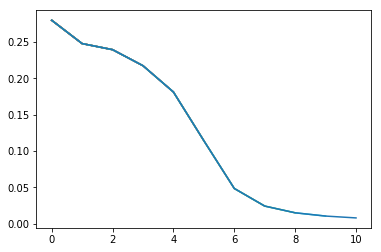

In [9]:
import matplotlib.pyplot as plt

result = list()
for i in range(nb_epoch+1):
    sess.run(train, feed_dict={X: x_data, Y: y_data})

    if i % 1000 ==0:
        c1 = sess.run(cost, feed_dict={X: x_data, Y: y_data})
        result.append(c1)
        plt.plot(result)
        print('step={} / cost={}'.format(i, c1))

* HW : 위의 코드를 변형하여 XOR 학습시 얻어진 Cost 그래프를 그리시오. Hint : List 사용</br>

### Check the results

In [0]:
# 일단 W1을 확인해볼까?
# print(W1)

결과가 시각적으로 잘 표현되지 않는 이유는 세션에서 실행이 되어야 하기 때문.</br>
그래서 제대로 된 결과를 보려면!

### 하지만 이러면 이후 결과가 바뀌게 된다. 세션을 한 번 더 돈 것이나 마찬가지이기 때문

In [0]:
# print(sess.run(W1))

In [12]:
for i in range(4):
    x1 = x_data[[i], :]

    l1 = tf.sigmoid(tf.matmul(x1, W1) + b1) # 해당 W1은 학습이 완료된 W1이다.
    l2 = tf.sigmoid(tf.matmul(l1, W2) + b2)
    l2cast = tf.cast(l2 > 0.5, dtype=tf.float32)    
    print( i, sess.run(l2), sess.run(l2cast), y_data[[i], :])
    #print( i, sess.run(l2))

0 [[0.09104632]] [[0.]] [[0.]]
1 [[0.8927126]] [[1.]] [[1.]]
2 [[0.9208363]] [[1.]] [[1.]]
3 [[0.07911842]] [[0.]] [[0.]]


### 참고 : Sigmoid

#### Sigmoid는 값들의 차이가 무지막지하게 나서 노이즈가 발생하는 것을 줄이기 위해 min-max 평준화 대용으로 나온 방법처럼 최솟값을 0, 최대값을 1로 설정해주는 방법(함수)이다.

In [13]:
y1 = 1.0
y2 = sess.run(tf.sigmoid(y1))
print('{} --> {}'.format(y1, y2))

1.0 --> 0.7310585975646973


Sigmoid를 그려볼까요?

In [14]:
x1 = np.arange(-10,10, 0.5)
print(x1)

[-10.   -9.5  -9.   -8.5  -8.   -7.5  -7.   -6.5  -6.   -5.5  -5.   -4.5
  -4.   -3.5  -3.   -2.5  -2.   -1.5  -1.   -0.5   0.    0.5   1.    1.5
   2.    2.5   3.    3.5   4.    4.5   5.    5.5   6.    6.5   7.    7.5
   8.    8.5   9.    9.5]


In [15]:
y1 = sess.run(tf.sigmoid(x1))
print(y1)

[4.53978687e-05 7.48462275e-05 1.23394576e-04 2.03426978e-04
 3.35350130e-04 5.52778637e-04 9.11051194e-04 1.50118226e-03
 2.47262316e-03 4.07013772e-03 6.69285092e-03 1.09869426e-02
 1.79862100e-02 2.93122308e-02 4.74258732e-02 7.58581800e-02
 1.19202922e-01 1.82425524e-01 2.68941421e-01 3.77540669e-01
 5.00000000e-01 6.22459331e-01 7.31058579e-01 8.17574476e-01
 8.80797078e-01 9.24141820e-01 9.52574127e-01 9.70687769e-01
 9.82013790e-01 9.89013057e-01 9.93307149e-01 9.95929862e-01
 9.97527377e-01 9.98498818e-01 9.99088949e-01 9.99447221e-01
 9.99664650e-01 9.99796573e-01 9.99876605e-01 9.99925154e-01]


In [0]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Sigmoid')

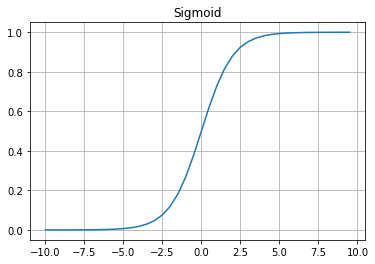

In [17]:
plt.plot(x1, y1)
plt.grid()
plt.title('Sigmoid')

상한선이 1 / 하한선이 0 으로 정해져 있다.